# Executive Summary

1. **This analysis explores ozone pollution across California using EPA data for 2024.**
2. **We cleaned and visualized the dataset to identify trends and outliers in ozone concentration.** 
3. **Our findings show that ozone levels peak in summer months, with counties like San Bernardino and Riverside consistently showing high pollution.**
4. **Weekdays tend to have higher ozone levels than weekends.**
5. **We recommend further monitoring and stricter pollution controls in the most affected counties.**

# Import Backages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/ozone.csv')
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

**This info show that data contains 54759 rows and 17 columns each column have perfect data type but 'Date' column, 'Method code' column and 'CBSA Code' column not yet**

**show null ratio**

<Axes: title={'center': 'Missing Values Ratio'}>

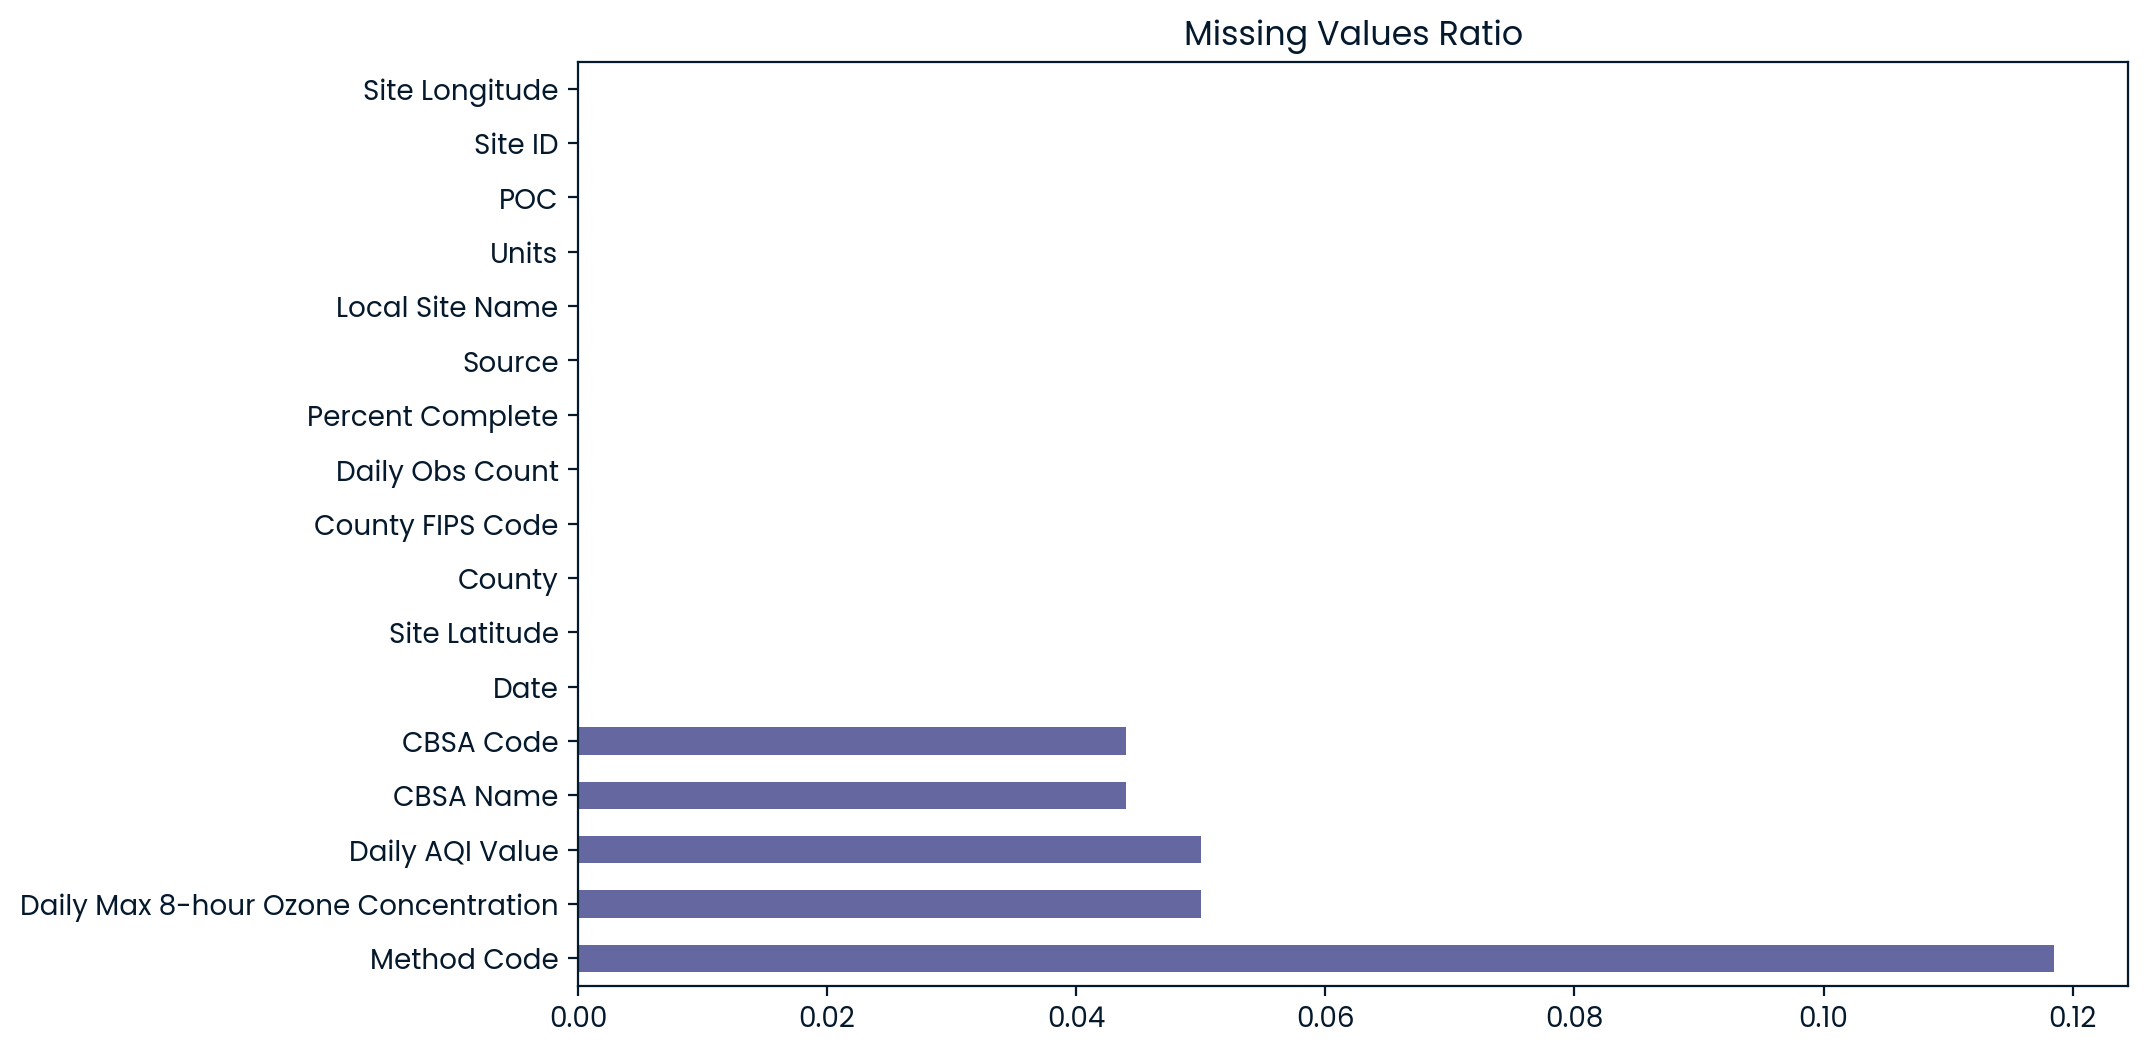

In [4]:
df.isnull().mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Missing Values Ratio')

**Check Duplicates**

In [5]:
df.duplicated().sum()

3576

**Drop Duplicates and check the process done**

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.shape

(51183, 17)

In [8]:
df.nunique()

Date                                    733
Source                                    2
Site ID                                 162
POC                                       2
Daily Max 8-hour Ozone Concentration    124
Units                                     1
Daily AQI Value                         120
Local Site Name                         162
Daily Obs Count                          24
Percent Complete                         23
Method Code                               4
CBSA Code                                32
CBSA Name                                32
County FIPS Code                         48
County                                   50
Site Latitude                           162
Site Longitude                          162
dtype: int64

# Data Cleaning

In [9]:
df['Date'].dtype

dtype('O')

**Check Unique values**

In [10]:
df['Date'].unique()

array(['/2024', '01/02/2024', 'January 04/2024', 'January 05/2024',
       'January 06/2024', '01/07/2024', 'January 10/2024',
       'January 11/2024', 'January 12/2024', '01/13/2024', '01/14/2024',
       '01/15/2024', '01/17/2024', '01/18/2024', '01/19/2024',
       '01/21/2024', '01/23/2024', '01/24/2024', '01/30/2024',
       '01/01/2024', 'January 02/2024', '01/03/2024', '01/04/2024',
       '01/06/2024', 'January 08/2024', '01/10/2024', '01/12/2024',
       '01/16/2024', 'January 18/2024', 'January 20/2024',
       'January 21/2024', '01/25/2024', 'January 26/2024', '01/27/2024',
       '01/29/2024', '01/31/2024', '02/02/2024', 'February 03/2024',
       '02/04/2024', '02/05/2024', '02/06/2024', '02/07/2024',
       '02/09/2024', '02/10/2024', '02/11/2024', '02/12/2024',
       '02/14/2024', 'February 17/2024', '02/18/2024', '02/19/2024',
       '02/20/2024', '02/21/2024', '02/22/2024', 'February 23/2024',
       'February 24/2024', '02/25/2024', '02/26/2024', '02/27/2024',
    

**Notice that there is the value '/2024' don't match to formate and when trying to convert it to datetime type we notice that it is convert to '1/1/2024' with 14813 value without any berief that it's correct value so first we must convert that value to null and convert other values to datetime type**

In [11]:
df['Date']=df['Date'].replace('/2024',np.nan)
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

**after that check unique values**

In [12]:
df['Date'].unique()

<DatetimeArray>
[                'NaT', '2024-01-02 00:00:00', '2024-01-07 00:00:00',
 '2024-01-13 00:00:00', '2024-01-14 00:00:00', '2024-01-15 00:00:00',
 '2024-01-17 00:00:00', '2024-01-18 00:00:00', '2024-01-19 00:00:00',
 '2024-01-21 00:00:00',
 ...
 '2024-06-08 00:00:00', '2024-02-16 00:00:00', '2024-03-03 00:00:00',
 '2024-03-09 00:00:00', '2024-05-02 00:00:00', '2024-07-05 00:00:00',
 '2024-07-09 00:00:00', '2024-06-12 00:00:00', '2024-10-17 00:00:00',
 '2024-03-08 00:00:00']
Length: 367, dtype: datetime64[ns]

**Check null values**

In [13]:
df['Date'].isna().sum()

14813

**this null values get from '/2024' let's show thier percent**

In [14]:
(df['Date'].isna().sum())/len(df)*100

28.94125002442217

**try to show if found complete null rows?**

In [15]:
df.isnull().all(axis=1).sum()

0

**not found any null rows so try to explore if date is sorted to show if we could change values with sort**

In [16]:
df.head(30)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,NaT,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,NaT,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,NaT,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,NaT,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
5,NaT,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
6,2024-01-07,AQS,60010007,1,0.030,ppm,28.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
7,NaT,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
8,NaT,AQS,60010007,1,0.034,ppm,31.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
9,NaT,AQS,60010007,1,0.036,ppm,33.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


**from past cells we notice that values not sorted so we couldn't to replace it with sort**

**try to found months distribution to show if one month these values are low**

In [17]:
df['Date'].dt.month.value_counts().sort_index()

Date
1.0     3065
2.0     2886
3.0     2931
4.0     2877
5.0     3107
6.0     3026
7.0     3125
8.0     3089
9.0     3108
10.0    3117
11.0    2968
12.0    3071
Name: count, dtype: int64

**The distribution is normal so we can expect values**

**So I want to sort values in dataframe with date**
**and drop null dates because couldn't fix it**

In [18]:
df=df.sort_values(by='Date').reset_index(drop=True)
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675
5,2024-01-01,AQS,60731201,1,NaN,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202


In [19]:
df = df[df['Date'].notnull()]

**Check drop done successfully by check shape of data**

In [20]:
df.shape

(36370, 17)

**let's check next column**

In [21]:
df['Source'].value_counts()

Source
AQS       32000
AirNow     4370
Name: count, dtype: int64

In [22]:
df['Source'].isnull().sum()

0

**Column is clean**

**let's check next column**

In [23]:
df['Site ID'].value_counts()

Site ID
60250005    268
60172004    266
60392010    262
60610003    259
60610004    258
           ... 
60010016    129
60170012    119
60450011     58
60010007     12
60470003      7
Name: count, Length: 162, dtype: int64

In [24]:
df['Site ID'].isnull().sum()

0

In [25]:
df['Site ID'].nunique()

162

**Column is clean**

**let's check next column**

In [26]:
df['POC'].value_counts()

POC
1    36359
2       11
Name: count, dtype: int64

In [27]:
df['POC'].isnull().sum()

0

**column is clean**

**let's check next column**

In [28]:
df['Daily Max 8-hour Ozone Concentration'].isnull().sum()

1785

In [29]:
df[df['Daily Max 8-hour Ozone Concentration'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
26591,2024-09-25,AQS,60450008,1,NaN,ppm,25.0,Ukiah-Gobbi Street,17,100.0,199.0,46380.0,"Ukiah, CA",45,Mendocino,39.145660,-123.202980
1166,2024-01-12,AQS,60731026,1,NaN,ppm,33.0,San Diego - Sherman Elementary School,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.710177,-117.142665
3182,2024-02-02,AQS,60731014,1,NaN,ppm,40.0,Donovan,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.578165,-116.921374
4008,2024-02-10,AQS,60719004,1,NaN,ppm,36.0,San Bernardino,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.106678,-117.274063
9480,2024-04-07,AQS,60712002,1,NaN,ppm,47.0,Fontana,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.100020,-117.492010
33893,2024-12-06,AQS,60832004,1,NaN,ppm,28.0,Lompoc H Street,17,100.0,87.0,42200.0,"Santa Maria-Santa Barbara, CA",83,Santa Barbara,34.637820,-120.457500
27774,2024-10-06,AQS,60731014,1,NaN,ppm,61.0,Donovan,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.578165,-116.921374
500,2024-01-05,AQS,61110007,1,NaN,ppm,33.0,Thousand Oaks,17,100.0,87.0,37100.0,"Oxnard-Thousand Oaks-Ventura, CA",111,Ventura,34.210169,-118.870509
4250,2024-02-12,AQS,61070009,1,NaN,ppm,30.0,Sequoia & Kings Canyon NPs - Ash Mountain,17,100.0,47.0,47300.0,"Visalia-Porterville, CA",107,Tulare,36.489470,-118.829150
14048,2024-05-23,AQS,60290007,1,NaN,ppm,71.0,Edison,17,100.0,87.0,12540.0,"Bakersfield, CA",29,Kern,35.345607,-118.851825


**notice that Ozone layer differ with month and county so we can expect these value from its mean in that month and that county**

In [30]:
df['Month'] = df['Date'].dt.month

df['Daily Max 8-hour Ozone Concentration'] = df.groupby(['County', 'Month'])['Daily Max 8-hour Ozone Concentration']\
                                              .transform(lambda x: x.fillna(x.median()))

**Check process done**

In [31]:
df['Daily Max 8-hour Ozone Concentration'].isnull().sum()

0

In [32]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1


**let's check next column**

In [33]:
df['Units'].value_counts()

Units
ppm    36370
Name: count, dtype: int64

In [34]:
df['Units'].isnull().sum()

0

**Column is clean**

**let's check next column**

In [35]:
df['Daily AQI Value'].value_counts()

Daily AQI Value
31.0     1951
44.0     1536
37.0     1207
36.0     1205
35.0     1172
         ... 
223.0       1
217.0       1
227.0       1
214.0       1
4.0         1
Name: count, Length: 118, dtype: int64

**not have outlier let's check null**

In [36]:
df['Daily AQI Value'].isnull().sum()

1870

In [37]:
df[df['Daily AQI Value'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month
15102,2024-06-03,AirNow,60130002,1,0.022,ppm,NaN,Concord,19,79.0,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",13,Contra Costa,37.936013,-122.026154,6
12649,2024-05-10,AQS,60990005,1,0.051,ppm,NaN,Modesto-14th Street,17,100.0,87.0,33700.0,"Modesto, CA",99,Stanislaus,37.642165,-120.994212,5
28017,2024-10-09,AQS,60730001,1,0.051,ppm,NaN,Chula Vista,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.631242,-117.059088,10
2857,2024-01-29,AQS,60271023,1,0.025,ppm,NaN,Bishop Tribe EMO,17,100.0,47.0,13860.0,"Bishop, CA",27,Inyo,37.362137,-118.417478,1
2617,2024-01-27,AQS,60714003,1,0.040,ppm,NaN,Redlands,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.059770,-117.147310,1
2907,2024-01-30,AQS,60270002,1,0.033,ppm,NaN,WMRC/NCORE,17,100.0,47.0,13860.0,"Bishop, CA",27,Inyo,37.360684,-118.330783,1
13900,2024-05-22,AQS,60831025,1,0.035,ppm,NaN,Los Flores Canyon #1,17,100.0,87.0,42200.0,"Santa Maria-Santa Barbara, CA",83,Santa Barbara,34.489740,-120.046920,5
19996,2024-07-21,AQS,60333002,1,0.033,ppm,NaN,Lakeport-S. Main Street,17,100.0,87.0,17340.0,"Clearlake, CA",33,Lake,39.018930,-122.913330,7
16864,2024-06-20,AQS,60650010,1,0.062,ppm,NaN,Joshua Tree NP - Cottonwood Visitor Center,17,100.0,47.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.747236,-115.820124,6
22694,2024-08-17,AQS,60773005,1,0.021,ppm,NaN,Tracy-Airport,17,100.0,87.0,44700.0,"Stockton-Lodi, CA",77,San Joaquin,37.682635,-121.442495,8


In [38]:
df.sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month
4383,2024-02-14,AQS,60731008,1,0.045,ppm,42.0,Camp Pendleton,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.217046,-117.396249,2
4998,2024-02-20,AQS,60731026,1,0.035,ppm,32.0,San Diego - Sherman Elementary School,17,100.0,47.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,32.710177,-117.142665,2
31392,2024-11-11,AirNow,60292012,1,0.038,ppm,35.0,Bakersfield-Muni,24,100.0,NaN,12540.0,"Bakersfield, CA",29,Kern,35.331612,-118.999961,11
24444,2024-09-04,AQS,60251003,1,0.059,ppm,64.0,El Centro-9th Street,15,88.0,87.0,20940.0,"El Centro, CA",25,Imperial,32.792220,-115.563060,9
26130,2024-09-20,AQS,60072003,1,0.050,ppm,46.0,Paradise-Clark,17,100.0,87.0,17020.0,"Chico, CA",7,Butte,39.757860,-121.607910,9
26000,2024-09-19,AQS,60719004,1,0.053,ppm,49.0,San Bernardino,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.106678,-117.274063,9
33295,2024-11-30,AQS,60690003,1,0.037,ppm,34.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,11
16893,2024-06-20,AirNow,60970004,1,0.025,ppm,23.0,Sebastopol,24,100.0,NaN,42220.0,"Santa Rosa, CA",97,Sonoma,38.403765,-122.818294,6
4356,2024-02-13,AQS,60131004,1,0.033,ppm,31.0,San Pablo,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",13,Contra Costa,37.960400,-122.356811,2
7656,2024-03-18,AQS,60890009,1,0.039,ppm,36.0,Shasta Lake - Lake Blvd,17,100.0,199.0,39820.0,"Redding, CA",89,Shasta,40.689253,-122.402194,3


**we can expect value by the week of day and county because its values usually close to each other so we can use mean**

In [39]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Daily AQI Value'] = df.groupby(['County', 'Week'])['Daily AQI Value']\
                          .transform(lambda x: x.fillna(x.median()))

In [40]:
df['Daily AQI Value'].isnull().sum()

0

**now column become clean**

In [41]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100.0,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100.0,87.0,46700.0,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100.0,87.0,41740.0,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100.0,87.0,39780.0,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100.0,87.0,NaN,NaN,93,Siskiyou,41.726892,-122.633579,1,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1,1


**let's clean next column**

In [42]:
df['Local Site Name'].unique()

array(['Colfax-City Hall', 'Pinnacles NP', 'Grass Valley-Litton Building',
       'Vacaville-Ulatis Drive', 'Los Gatos', 'Pala Airpad',
       'Hesperia-Olive Street', 'Red Bluff-Walnut St. District Office',
       'Yreka', 'Temecula', 'Chico-East Avenue',
       'La Posta Band of Indians', 'Woodland-Gibson Road', 'Sloughhouse',
       'Yosemite NP', 'Bakersfield-California',
       'Table Mountain Air Monitoring Site', 'Lincoln-2885 Moore Road',
       'San Rafael', 'Sequoia & Kings Canyon NPs - Ash Mountain',
       'Anaheim', 'Oakland West', 'Lompoc HSP', 'Chula Vista',
       'Paradise Road', 'Fresno-Sky Park', 'Jacobs',
       'Simi Valley-Cochran Street', 'Hayward',
       'PLACERVILLE- CANAL STREET', 'Alpine', 'Fairfield',
       'Piru - Pacific', 'Parlier', 'Victorville-Park Avenue',
       'Crestline', 'Joshua Tree NP - Cottonwood Visitor Center',
       'Donovan', 'Salinas 3', 'Carmel Valley', 'Yuba City', 'Barstow',
       'Fresno - Garland', 'Hanford-Irwin', 'Carpinteria',


**the formate is clean let's check if unique values in this column = unique value in Site id column**

In [43]:
df['Local Site Name'].nunique()

162

**values are equal let's check nulls**

In [44]:
df['Local Site Name'].isnull().sum()

0

**now column is clean let's check next column**

In [45]:
df['Daily Obs Count'].value_counts()

Daily Obs Count
17      30651
24       3968
1000      361
14        324
13        288
15        269
19        133
16        131
18        119
21         37
22         27
23         25
20         16
12          6
11          3
10          3
9           2
7           1
2           1
6           1
1           1
8           1
5           1
4           1
Name: count, dtype: int64

**after check unique values we notice that values between 0-24 and notice 361 values equal 1000**

**let's show county with this value to try expect real value**

In [46]:
df[df['Daily Obs Count'] == 1000]['County'].value_counts()

County
San Bernardino     31
Santa Barbara      28
Kern               20
Riverside          19
Los Angeles        19
Ventura            18
Fresno             17
Sacramento         16
Tulare             14
San Diego          14
Placer             13
San Luis Obispo    13
Monterey            9
Imperial            8
Santa Clara         8
Butte               8
Orange              7
Alameda             7
San Benito          7
Stanislaus          5
Contra Costa        5
Inyo                5
El Dorado           4
Solano              4
Mendocino           4
Santa Cruz          4
Amador              4
Marin               4
Nevada              4
Sonoma              4
Colusa              3
Shasta              3
Lake                3
San Joaquin         3
San Francisco       3
Siskiyou            3
Tehama              2
Kings               2
Mariposa            2
Humboldt            2
Yolo                2
Merced              2
Calaveras           2
Madera              2
Tuolumne            1
Gle

In [47]:
df[df['County'] == 'San Bernardino']['Daily Obs Count'].value_counts()

Daily Obs Count
17      2045
1000      31
24        24
15        12
13        11
18         9
14         8
16         6
19         3
12         2
11         2
Name: count, dtype: int64

In [48]:
df[df['County'] == 'San Bernardino'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
25408,2024-09-13,AQS,60714001,1,0.078,ppm,126.0,Hesperia-Olive Street,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.28563,9,37
18605,2024-07-08,AQS,60711234,1,0.078,ppm,67.0,Trona - Athol/Telescope #2,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,35.774460,-117.37210,7,28
26251,2024-09-21,AQS,60712002,1,0.064,ppm,80.0,Fontana,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.100020,-117.49201,9,38
26668,2024-09-25,AQS,60711234,1,0.058,ppm,61.0,Trona - Athol/Telescope #2,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,35.774460,-117.37210,9,39
13369,2024-05-17,AQS,60710001,1,0.065,ppm,84.0,Barstow,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.894050,-117.02471,5,20
7573,2024-03-18,AQS,60719002,1,0.047,ppm,44.0,Joshua Tree NP,17,100.0,47.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.069570,-116.38893,3,12
14611,2024-05-29,AQS,60710306,1,0.072,ppm,105.0,Victorville-Park Avenue,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.510961,-117.32554,5,22
20425,2024-07-25,AQS,60714003,1,0.109,ppm,204.0,Redlands,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.059770,-117.14731,7,30
5554,2024-02-26,AQS,60710306,1,0.041,ppm,38.0,Victorville-Park Avenue,15,88.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.510961,-117.32554,2,9
21674,2024-08-07,AQS,60710001,1,0.069,ppm,97.0,Barstow,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.894050,-117.02471,8,32


**we can replace this value with mode value related by the county**

In [49]:
df['Daily Obs Count'] = df.groupby(['County', 'Local Site Name'])['Daily Obs Count']\
    .transform(lambda x: x.replace(1000, x.mode()[0] if not x.mode().empty else x))
df['Daily Obs Count'].unique()

array([17, 24, 13, 15, 19, 18, 16, 14, 23, 20, 21, 22, 12,  9, 11, 10,  7,
        2,  6,  1,  8,  5,  4])

**check process done**

In [50]:
df['Daily Obs Count'].isnull().sum()

0

**let's check next column**

In [51]:
df['Percent Complete'].value_counts()

Percent Complete
100.0    34968
82.0       328
88.0       308
76.0       289
94.0       134
79.0       133
75.0       121
92.0        27
96.0        25
83.0        16
71.0         6
65.0         3
59.0         3
53.0         2
41.0         1
12.0         1
35.0         1
6.0          1
47.0         1
29.0         1
24.0         1
Name: count, dtype: int64

**after show unique value we notice there are value <75 that will be effect on analysis**

In [52]:
df = df[df['Percent Complete'] >= 75]
df.shape

(36349, 19)

**now change data type to int**

In [53]:
df['Percent Complete']=df['Percent Complete'].astype(int)
df['Percent Complete'].dtype

dtype('int64')

**now column clean let's check next column**

In [54]:
df['Method Code'].value_counts()

Method Code
87.0     23350
47.0      5674
199.0     2697
53.0       258
Name: count, dtype: int64

In [55]:
df['Method Code'].isnull().sum()

4370

In [56]:
df[df['Method Code'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
15824,2024-06-10,AirNow,60650009,1,0.044,ppm,41.0,Pechanga,24,100,NaN,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.447867,-117.088649,6,24
7000,2024-03-12,AirNow,60111002,1,0.035,ppm,32.0,Colusa-Sunrise Blvd,24,100,NaN,NaN,NaN,11,Colusa,39.189190,-121.998870,3,11
7777,2024-03-20,AirNow,60811001,1,0.036,ppm,32.0,Redwood City,24,100,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",81,San Mateo,37.482934,-122.203370,3,12
8573,2024-03-28,AirNow,60570005,1,0.035,ppm,33.0,Grass Valley-Litton Building,24,100,NaN,46020.0,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,3,13
17170,2024-06-23,AirNow,60850002,1,0.051,ppm,47.0,Gilroy,24,100,NaN,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,36.999571,-121.574684,6,25
26500,2024-09-24,AirNow,60970004,1,0.036,ppm,33.0,Sebastopol,24,100,NaN,42220.0,"Santa Rosa, CA",97,Sonoma,38.403765,-122.818294,9,39
35396,2024-12-22,AirNow,60254004,1,0.033,ppm,31.0,Niland-English Road,24,100,NaN,20940.0,"El Centro, CA",25,Imperial,33.213611,-115.545280,12,51
2005,2024-01-21,AirNow,60794002,1,0.025,ppm,23.0,Nipomo Regional Park (NRP),24,100,NaN,42020.0,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",79,San Luis Obispo,35.031460,-120.501030,1,3
14132,2024-05-24,AirNow,60750005,1,0.030,ppm,28.0,San Francisco,24,100,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",75,San Francisco,37.765946,-122.399044,5,21
11092,2024-04-23,AirNow,60750005,1,0.036,ppm,33.0,San Francisco,24,100,NaN,41860.0,"San Francisco-Oakland-Hayward, CA",75,San Francisco,37.765946,-122.399044,4,17


**we can expect values from site id column and poc column with mode**

In [57]:
df['Method Code'] = df.groupby(['Site ID', 'POC'])['Method Code']\
                      .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

**check process done**

In [58]:
df['Method Code'].isnull().sum()

402

**now we can expect remain values from country with site name**

In [59]:
df['Method Code'] = df.groupby(['County','Local Site Name'])['Method Code']\
                      .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

**check process done**

In [60]:
df['Method Code'].isnull().sum()

402

**we can expect remain values from mode**

In [61]:
df['Method Code'].fillna(df['Method Code'].mode().iloc[0], inplace=True)

**check process done**

In [62]:
df['Method Code'].isnull().sum()

0

**Change Data type**

In [63]:
df['Method Code']=df['Method Code'].astype(int)

In [64]:
df['Method Code'].dtype

dtype('int64')

**let's check next value**

In [65]:
df['CBSA Code'].value_counts()

CBSA Code
40140.0    4820
40900.0    3412
31080.0    3306
41860.0    2349
41740.0    2138
42200.0    2130
12540.0    1849
23420.0    1671
42020.0    1458
37100.0    1214
41940.0    1213
47300.0     851
20940.0     817
41500.0     735
13860.0     685
39820.0     637
46700.0     629
31460.0     498
17020.0     485
44700.0     466
33700.0     459
39780.0     395
49700.0     372
46380.0     290
43760.0     252
42100.0     250
32900.0     247
46020.0     244
25260.0     239
17340.0     238
21700.0     231
42220.0     187
Name: count, dtype: int64

In [66]:
df['CBSA Code'].isnull().sum()

1582

**show sample from null CBSA**

In [67]:
df[df['CBSA Code'].isnull()].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
23449,2024-08-25,AQS,60430006,1,0.041,ppm,38.0,Jerseydale,17,100,87,NaN,NaN,43,Mariposa,37.543770,-119.839570,8,34
1922,2024-01-20,AQS,60430003,1,0.041,ppm,38.0,Yosemite NP,17,100,47,NaN,NaN,43,Mariposa,37.713250,-119.706200,1,3
9200,2024-04-04,AQS,60210003,1,0.042,ppm,39.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.533870,-122.190834,4,14
26685,2024-09-26,AQS,60090001,1,0.051,ppm,47.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.201850,-120.680277,9,39
5380,2024-02-24,AQS,60050002,1,0.036,ppm,33.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,2,8
28138,2024-10-10,AQS,60090001,1,0.047,ppm,44.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.201850,-120.680277,10,41
34103,2024-12-09,AQS,60430003,1,0.047,ppm,44.0,Yosemite NP,17,100,87,NaN,NaN,43,Mariposa,37.713250,-119.706200,12,50
10977,2024-04-22,AQS,60430006,1,0.041,ppm,38.0,Jerseydale,17,100,87,NaN,NaN,43,Mariposa,37.543770,-119.839570,4,17
32482,2024-11-22,AQS,60111002,1,0.029,ppm,27.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.189190,-121.998870,11,47
14493,2024-05-28,AQS,60932001,1,0.047,ppm,44.0,Yreka,17,100,87,NaN,NaN,93,Siskiyou,41.726892,-122.633579,5,22


**let's show rows of these counties**

In [68]:
df[df['County']=='Colusa'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
31032,2024-11-08,AQS,60111002,1,0.045,ppm,42.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,11,45
29637,2024-10-25,AQS,60111002,1,0.041,ppm,38.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,10,43
6043,2024-03-01,AirNow,60111002,1,0.041,ppm,38.0,Colusa-Sunrise Blvd,24,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,3,9
8166,2024-03-24,AirNow,60111002,1,0.038,ppm,35.0,Colusa-Sunrise Blvd,24,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,3,12
14246,2024-05-25,AQS,60111002,1,0.033,ppm,31.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,5,21
5894,2024-02-29,AirNow,60111002,1,0.038,ppm,35.0,Colusa-Sunrise Blvd,24,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,2,9
21945,2024-08-10,AQS,60111002,1,0.046,ppm,43.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,8,32
863,2024-01-09,AirNow,60111002,1,0.022,ppm,20.0,Colusa-Sunrise Blvd,24,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,1,2
26020,2024-09-19,AQS,60111002,1,0.047,ppm,44.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,9,38
15435,2024-06-06,AQS,60111002,1,0.052,ppm,48.0,Colusa-Sunrise Blvd,17,100,87,NaN,NaN,11,Colusa,39.18919,-121.99887,6,23


In [69]:
df[df['County']=='Calaveras'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
7812,2024-03-20,AQS,60090001,1,0.0460,ppm,43.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,3,12
1159,2024-01-12,AQS,60090001,1,0.0300,ppm,28.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,1,2
14628,2024-05-29,AQS,60090001,1,0.0490,ppm,45.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,5,22
14930,2024-06-01,AQS,60090001,1,0.0500,ppm,46.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,6,22
30317,2024-10-31,AQS,60090001,1,0.0500,ppm,39.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,10,44
9155,2024-04-03,AQS,60090001,1,0.0490,ppm,45.0,San Andreas-Gold Strike Road,16,94,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,4,14
4295,2024-02-13,AQS,60090001,1,0.0355,ppm,33.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,2,7
27486,2024-10-03,AQS,60090001,1,0.0530,ppm,49.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,10,40
7301,2024-03-15,AQS,60090001,1,0.0430,ppm,40.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,3,11
13023,2024-05-13,AQS,60090001,1,0.0550,ppm,51.0,San Andreas-Gold Strike Road,17,100,87,NaN,NaN,9,Calaveras,38.20185,-120.680277,5,20


In [70]:
df[df['County']=='Glenn'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
542,2024-01-06,AirNow,60210003,1,0.0260,ppm,24.0,Willows-Colusa Street,24,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,1,1
31583,2024-11-13,AQS,60210003,1,0.0290,ppm,27.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,11,46
16719,2024-06-19,AQS,60210003,1,0.0420,ppm,39.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,6,25
7813,2024-03-20,AQS,60210003,1,0.0410,ppm,38.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,3,12
15758,2024-06-09,AQS,60210003,1,0.0440,ppm,41.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,6,23
14712,2024-05-30,AQS,60210003,1,0.0440,ppm,41.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,5,22
1662,2024-01-17,AirNow,60210003,1,0.0270,ppm,25.0,Willows-Colusa Street,24,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,1,3
1869,2024-01-19,AirNow,60210003,1,0.0150,ppm,14.0,Willows-Colusa Street,24,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,1,3
29168,2024-10-20,AQS,60210003,1,0.0520,ppm,48.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,10,42
16609,2024-06-18,AQS,60210003,1,0.0410,ppm,38.0,Willows-Colusa Street,17,100,87,NaN,NaN,21,Glenn,39.53387,-122.190834,6,25


In [71]:
df[df['County']=='Amador'].sample(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
7562,2024-03-17,AQS,60050002,1,0.043,ppm,40.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,3,11
32831,2024-11-26,AQS,60050002,1,0.031,ppm,29.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,11,48
832,2024-01-09,AQS,60050002,1,0.026,ppm,24.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,1,2
22661,2024-08-17,AQS,60050002,1,0.026,ppm,44.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,8,33
18135,2024-07-03,AQS,60050002,1,0.083,ppm,143.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,7,27
1633,2024-01-17,AQS,60050002,1,0.031,ppm,29.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,1,3
4924,2024-02-19,AQS,60050002,1,0.039,ppm,36.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,2,8
33529,2024-12-03,AQS,60050002,1,0.027,ppm,25.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,12,49
11421,2024-04-27,AQS,60050002,1,0.040,ppm,37.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,4,17
735,2024-01-08,AQS,60050002,1,0.026,ppm,24.0,Jackson-Clinton Road,17,100,87,NaN,NaN,5,Amador,38.342606,-120.764426,1,2


**We notice that these counties are rural areas that do not have a CBSA.**

**because CBSA code is int column we will fill it with -1 To indicate that it is without CBSA.**

In [72]:
df['CBSA Code'] = df['CBSA Code'].fillna(-1)

**check process done**

In [73]:
df['CBSA Code'].isnull().sum()

0

**change data type to int**

In [74]:
df['CBSA Code']=df['CBSA Code'].astype(int)
df['CBSA Code'].dtype

dtype('int64')

**now this column is clean let's check next column**

In [75]:
df['CBSA Name'].isnull().sum()

1582

**CBSA name column contain same number of null values with same counties so we will fill it with 'Non-CBSA' beacause it object column**

In [76]:
df['CBSA Name'] = df['CBSA Name'].fillna('Non-CBSA')

In [77]:
df['CBSA Name'].isnull().sum()

0

**check unique values**

In [78]:
df['CBSA Name'].unique()

array(['Sacramento--Roseville--Arden-Arcade, CA',
       'San Jose-Sunnyvale-Santa Clara, CA', 'Truckee-Grass Valley, CA',
       'Vallejo-Fairfield, CA', 'San Diego-Carlsbad, CA',
       'Riverside-San Bernardino-Ontario, CA', 'Red Bluff, CA',
       'Non-CBSA', 'Chico, CA', 'Bakersfield, CA', 'Fresno, CA',
       'San Francisco-Oakland-Hayward, CA', 'Visalia-Porterville, CA',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Santa Maria-Santa Barbara, CA', 'Eureka-Arcata-Fortuna, CA',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Salinas, CA', 'Yuba City, CA',
       'Hanford-Corcoran, CA', 'Modesto, CA', 'Merced, CA',
       'San Luis Obispo-Paso Robles-Arroyo Grande, CA', 'Clearlake, CA',
       'Santa Rosa, CA', 'El Centro, CA', 'Sonora, CA', 'Redding, CA',
       'Stockton-Lodi, CA', 'Madera, CA', 'Santa Cruz-Watsonville, CA',
       'Bishop, CA', 'Ukiah, CA'], dtype=object)

**the formate is clean on form of 'City1-City2-City3, CA' but the 'Sacramento--Roseville--Arden-Arcade, CA' is against it with double dashes so we must fix it**

In [79]:
df['CBSA Name'] = df['CBSA Name'].replace(
    {'Sacramento--Roseville--Arden-Arcade, CA': 'Sacramento-Roseville-Arden-Arcade, CA'})

**check process done**

In [80]:
df['CBSA Name'].unique()

array(['Sacramento-Roseville-Arden-Arcade, CA',
       'San Jose-Sunnyvale-Santa Clara, CA', 'Truckee-Grass Valley, CA',
       'Vallejo-Fairfield, CA', 'San Diego-Carlsbad, CA',
       'Riverside-San Bernardino-Ontario, CA', 'Red Bluff, CA',
       'Non-CBSA', 'Chico, CA', 'Bakersfield, CA', 'Fresno, CA',
       'San Francisco-Oakland-Hayward, CA', 'Visalia-Porterville, CA',
       'Los Angeles-Long Beach-Anaheim, CA',
       'Santa Maria-Santa Barbara, CA', 'Eureka-Arcata-Fortuna, CA',
       'Oxnard-Thousand Oaks-Ventura, CA', 'Salinas, CA', 'Yuba City, CA',
       'Hanford-Corcoran, CA', 'Modesto, CA', 'Merced, CA',
       'San Luis Obispo-Paso Robles-Arroyo Grande, CA', 'Clearlake, CA',
       'Santa Rosa, CA', 'El Centro, CA', 'Sonora, CA', 'Redding, CA',
       'Stockton-Lodi, CA', 'Madera, CA', 'Santa Cruz-Watsonville, CA',
       'Bishop, CA', 'Ukiah, CA'], dtype=object)

**now this column is clean let's check next value**

In [81]:
df['County FIPS Code'].value_counts()

County FIPS Code
37     2820
65     2671
71     2149
73     2138
83     2130
29     1849
19     1671
79     1458
61     1228
111    1214
67     1197
1       914
107     851
25      817
85      751
53      735
13      732
27      685
89      637
95      629
17      519
39      498
59      486
7       485
113     468
77      466
69      462
99      459
43      400
103     395
101     372
45      290
109     252
87      250
47      247
93      247
41      246
57      244
75      241
21      240
31      239
33      238
5       236
11      231
23      231
9       228
81      216
97      187
Name: count, dtype: int64

In [82]:
df['County FIPS Code'].isnull().sum()

0

**this column is clean let's check next column**

**show unique values**

In [83]:
df['County'].unique()

array(['Placer', 'San Benito', 'Nevada', 'Solano', 'Santa Clara',
       'San Diego', 'San Bernardino', 'Tehama', 'Siskiyou', 'Riverside',
       'Butte', 'Yolo', 'Sacramento', 'Mariposa', 'Kern', 'Fresno',
       'Marin', 'Tulare', 'Orange', 'Alameda', 'Santa Barbara',
       'Humboldt', 'Ventura', 'El Dorado', 'Monterey', 'Sutter', 'Kings',
       'Stanislaus', 'Merced', 'Los Angeles', 'Contra Costa',
       'San Luis Obispo', 'San Mateo', 'Lake', 'Sonoma', 'Imperial',
       'Tuolumne', 'Shasta', 'San Joaquin', 'Madera', 'Santa Cruz',
       'Colusa', 'Inyo', 'San Francisco', 'Glenn', 'Amador', 'Mendocino',
       'Calaveras', 'LA', 'SF'], dtype=object)

**notice that we have 'LA','SF' values that we should replace that by real values to match format**

In [84]:
df['County'] = df['County'].replace({
    'LA': 'Los Angeles',
    'SF': 'San Francisco'
})

**check process done**

In [85]:
df['County'].unique()

array(['Placer', 'San Benito', 'Nevada', 'Solano', 'Santa Clara',
       'San Diego', 'San Bernardino', 'Tehama', 'Siskiyou', 'Riverside',
       'Butte', 'Yolo', 'Sacramento', 'Mariposa', 'Kern', 'Fresno',
       'Marin', 'Tulare', 'Orange', 'Alameda', 'Santa Barbara',
       'Humboldt', 'Ventura', 'El Dorado', 'Monterey', 'Sutter', 'Kings',
       'Stanislaus', 'Merced', 'Los Angeles', 'Contra Costa',
       'San Luis Obispo', 'San Mateo', 'Lake', 'Sonoma', 'Imperial',
       'Tuolumne', 'Shasta', 'San Joaquin', 'Madera', 'Santa Cruz',
       'Colusa', 'Inyo', 'San Francisco', 'Glenn', 'Amador', 'Mendocino',
       'Calaveras'], dtype=object)

**finally check nulls**

In [86]:
df['County'].isnull().sum()

0

**let's check next column**

In [87]:
df['Site Latitude'].isnull().sum()

0

In [88]:
df['Site Latitude'].nunique()

162

In [89]:
df['Site Latitude'].unique()

array([39.1001745 , 36.48324   , 39.233477  , 38.35655   , 37.226862  ,
       33.36259283, 34.41651   , 40.17093   , 41.726892  , 33.583018  ,
       39.76168   , 32.725189  , 38.66121   , 38.494475  , 37.71325   ,
       35.356615  , 36.98511856, 38.867937  , 37.97231   , 36.48947   ,
       33.83062   , 37.814781  , 34.725352  , 32.631242  , 34.54166   ,
       36.841592  , 40.77678   , 34.276316  , 37.654456  , 38.73196   ,
       32.842318  , 38.227066  , 34.404281  , 36.597442  , 34.51096111,
       34.2431    , 33.747236  , 32.578165  , 36.694261  , 36.48187   ,
       39.13877254, 34.89405   , 36.78538   , 36.31567   , 34.403052  ,
       32.845709  , 35.77446   , 35.04944   , 37.348497  , 37.488317  ,
       33.92086   , 37.281853  , 34.210169  , 38.683304  , 33.793713  ,
       37.743649  , 35.361589  , 35.331612  , 38.56844   , 35.03146   ,
       33.99958   , 37.482934  , 36.705474  , 39.01893   , 38.403765  ,
       35.49453   , 34.38344   , 34.14435   , 37.743065  , 34.18

**The column is clean let's check last column**

In [90]:
df['Site Longitude'].isnull().sum()

0

In [91]:
df['Site Longitude'].nunique()

162

In [92]:
df['Site Longitude'].unique()

array([-120.95383171, -121.15688   , -121.055608  , -121.94986   ,
       -121.979675  , -117.09023   , -117.28563   , -122.25556   ,
       -122.633579  , -117.072202  , -121.84047   , -116.36441   ,
       -121.73269   , -121.211131  , -119.7062    , -119.062613  ,
       -119.65833935, -121.338353  , -122.520004  , -118.82915   ,
       -117.93845   , -122.282347  , -120.428717  , -117.059088  ,
       -119.79146   , -119.874739  , -124.17949   , -118.683685  ,
       -122.031547  , -120.81162   , -116.768293  , -122.075624  ,
       -118.80998   , -119.503659  , -117.32554   , -117.27235   ,
       -115.820124  , -116.921374  , -121.623271  , -121.73333   ,
       -121.61854899, -117.02471   , -119.77321   , -119.643447  ,
       -119.457914  , -117.123964  , -117.3721    , -118.18893   ,
       -121.894898  , -120.836008  , -116.85841   , -120.433671  ,
       -118.870509  , -121.164457  , -118.171019  , -121.934188  ,
       -120.836819  , -118.999961  , -121.49311   , -120.50103

**Now data is cleaning let's show it**

In [93]:
df.head(20)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Month,Week
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100,87,40900,"Sacramento-Roseville-Arden-Arcade, CA",61,Placer,39.100174,-120.953832,1,1
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880,1,1
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100,87,46020,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608,1,1
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100,87,46700,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860,1,1
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675,1,1
5,2024-01-01,AQS,60731201,1,0.040,ppm,18.0,Pala Airpad,17,100,87,41740,"San Diego-Carlsbad, CA",73,San Diego,33.362593,-117.090230,1,1
6,2024-01-01,AQS,60714001,1,0.033,ppm,31.0,Hesperia-Olive Street,17,100,87,40140,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.416510,-117.285630,1,1
7,2024-01-01,AQS,61030007,1,0.019,ppm,18.0,Red Bluff-Walnut St. District Office,17,100,87,39780,"Red Bluff, CA",103,Tehama,40.170930,-122.255560,1,1
8,2024-01-01,AQS,60932001,1,0.022,ppm,20.0,Yreka,17,100,87,-1,Non-CBSA,93,Siskiyou,41.726892,-122.633579,1,1
9,2024-01-01,AQS,60650016,1,0.040,ppm,37.0,Temecula,17,100,87,40140,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.583018,-117.072202,1,1


In [94]:
df.drop(columns=['Month','Week'],inplace=True)

**let's show final data and new info**

In [95]:
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100,87,40900,"Sacramento-Roseville-Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100,87,46020,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100,87,46700,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36349 entries, 0 to 36369
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  36349 non-null  datetime64[ns]
 1   Source                                36349 non-null  object        
 2   Site ID                               36349 non-null  int64         
 3   POC                                   36349 non-null  int64         
 4   Daily Max 8-hour Ozone Concentration  36349 non-null  float64       
 5   Units                                 36349 non-null  object        
 6   Daily AQI Value                       36349 non-null  float64       
 7   Local Site Name                       36349 non-null  object        
 8   Daily Obs Count                       36349 non-null  int64         
 9   Percent Complete                      36349 non-null  int64         
 10  Met

In [97]:
df.shape

(36349, 17)

<Axes: title={'center': 'Missing Values Ratio'}>

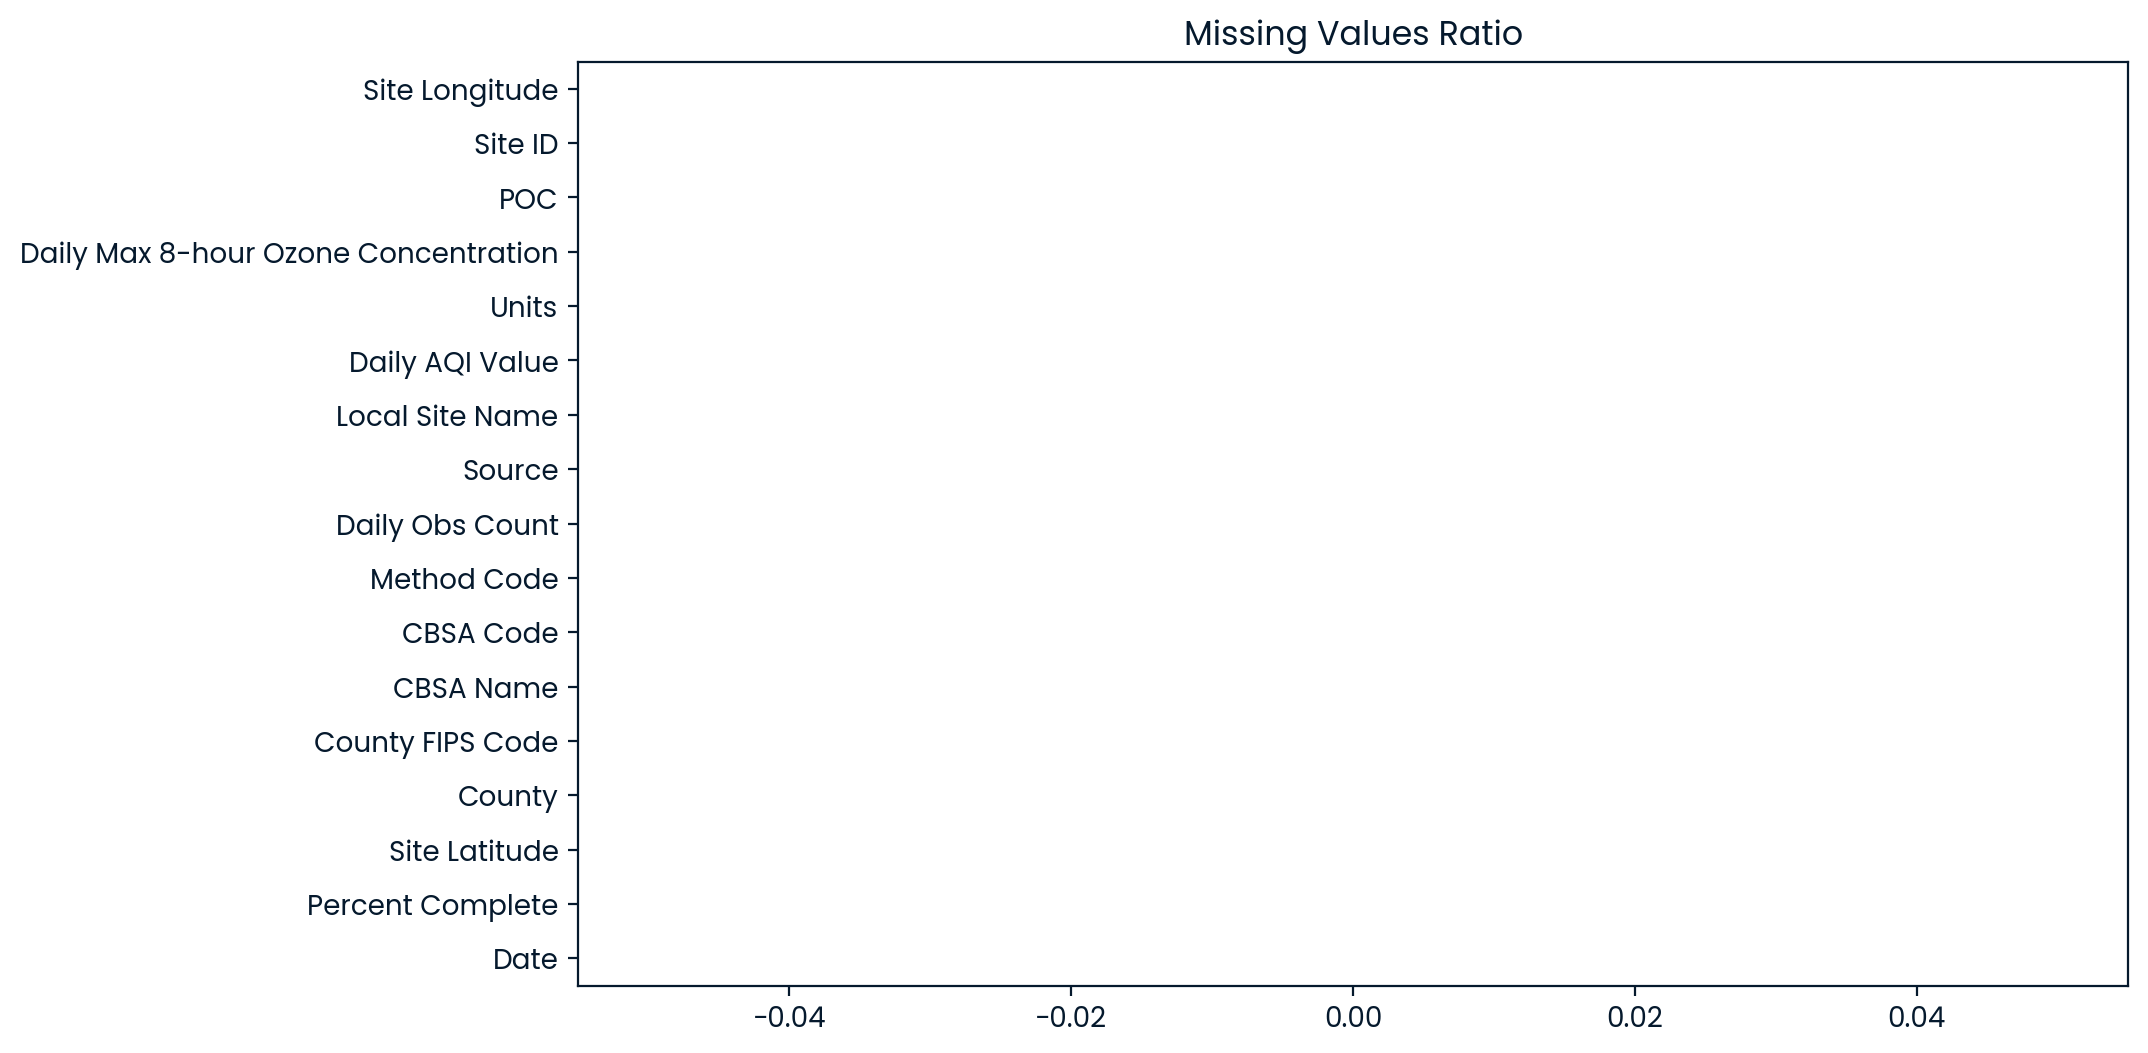

In [98]:
df.isnull().mean().sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Missing Values Ratio')

# Data Visualization

### 1. How does daily maximum 8-hour ozone concentration vary over time and regions?

<Axes: title={'center': 'Monthly Avg Ozone Over Time'}, xlabel='Month'>

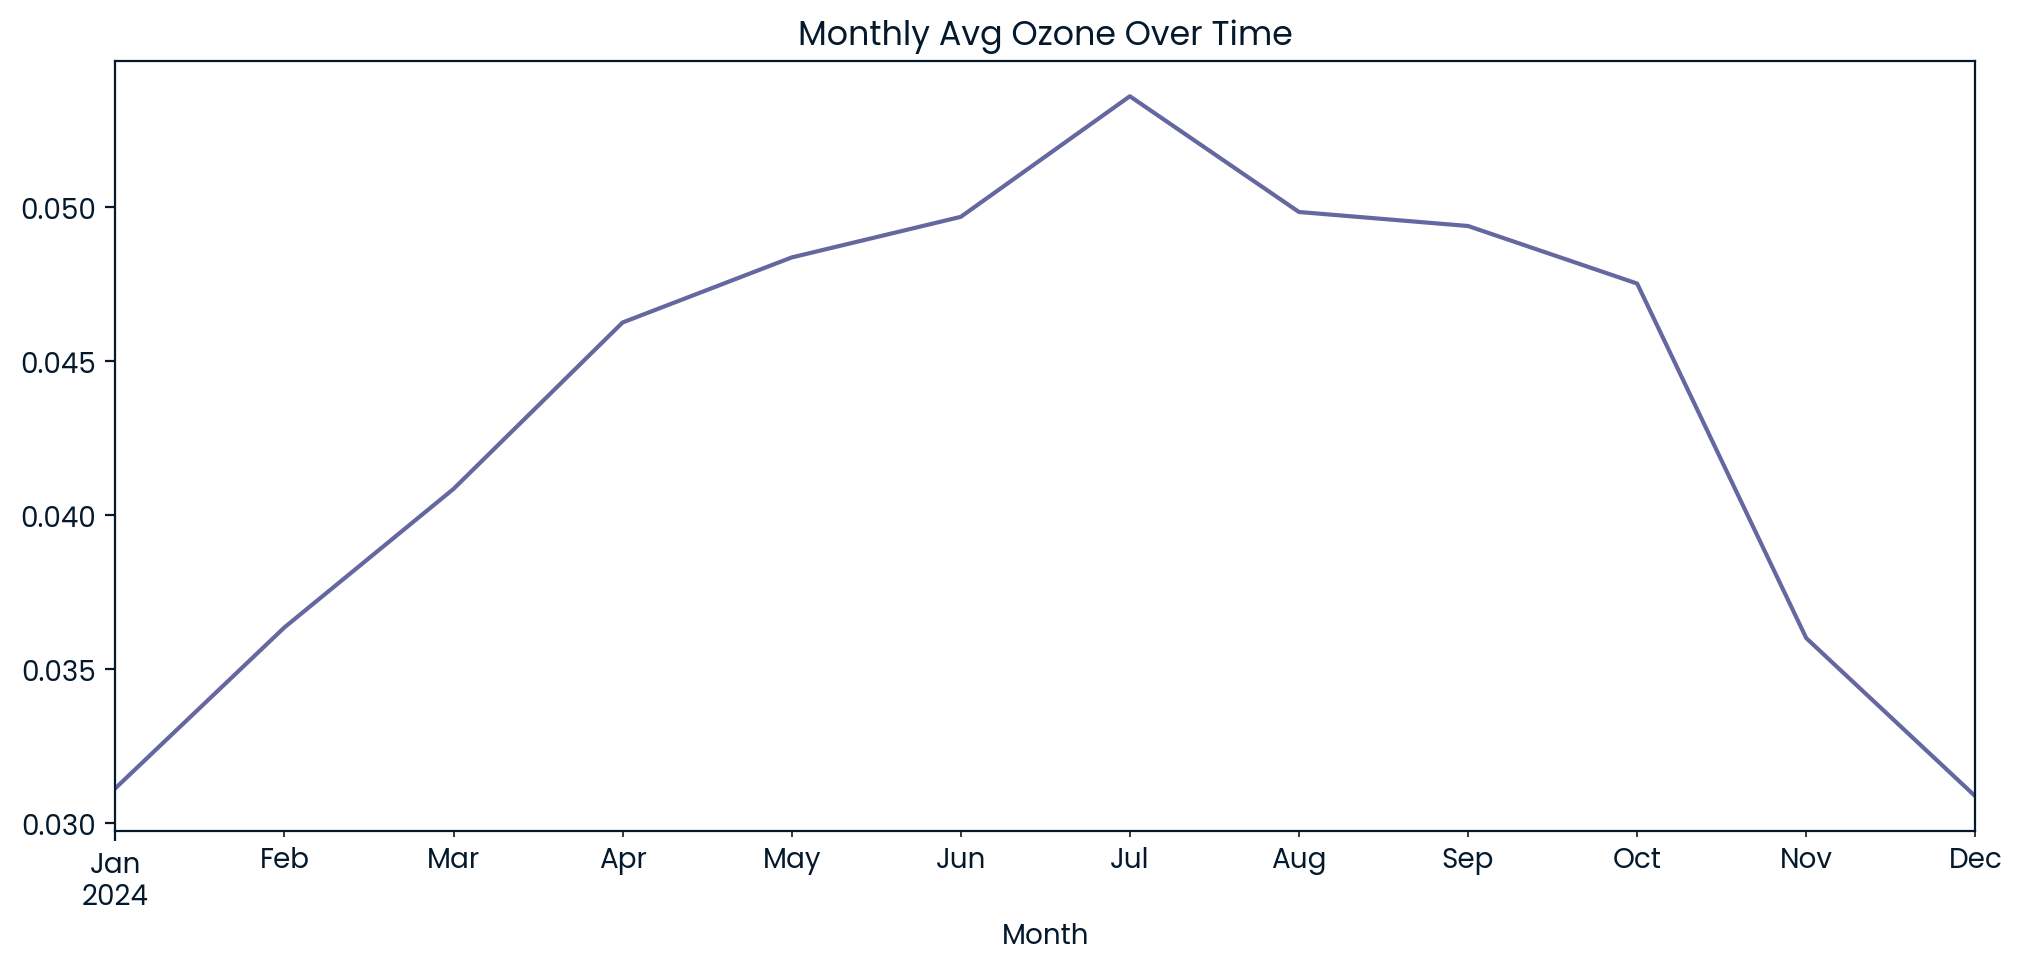

In [99]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Daily Max 8-hour Ozone Concentration'].mean()
monthly_avg.plot(figsize=(12, 5), title='Monthly Avg Ozone Over Time')

**The plot shows a clear seasonal trend in ozone concentration throughout the year. Ozone levels gradually increase from January, peaking in July, and then decline towards December.**

**This pattern suggests that ozone pollution is highest during summer months, likely due to increased sunlight and higher temperatures, which enhance photochemical reactions that form ozone.**

Text(0.5, 1.0, 'Ozone Concentration by County')

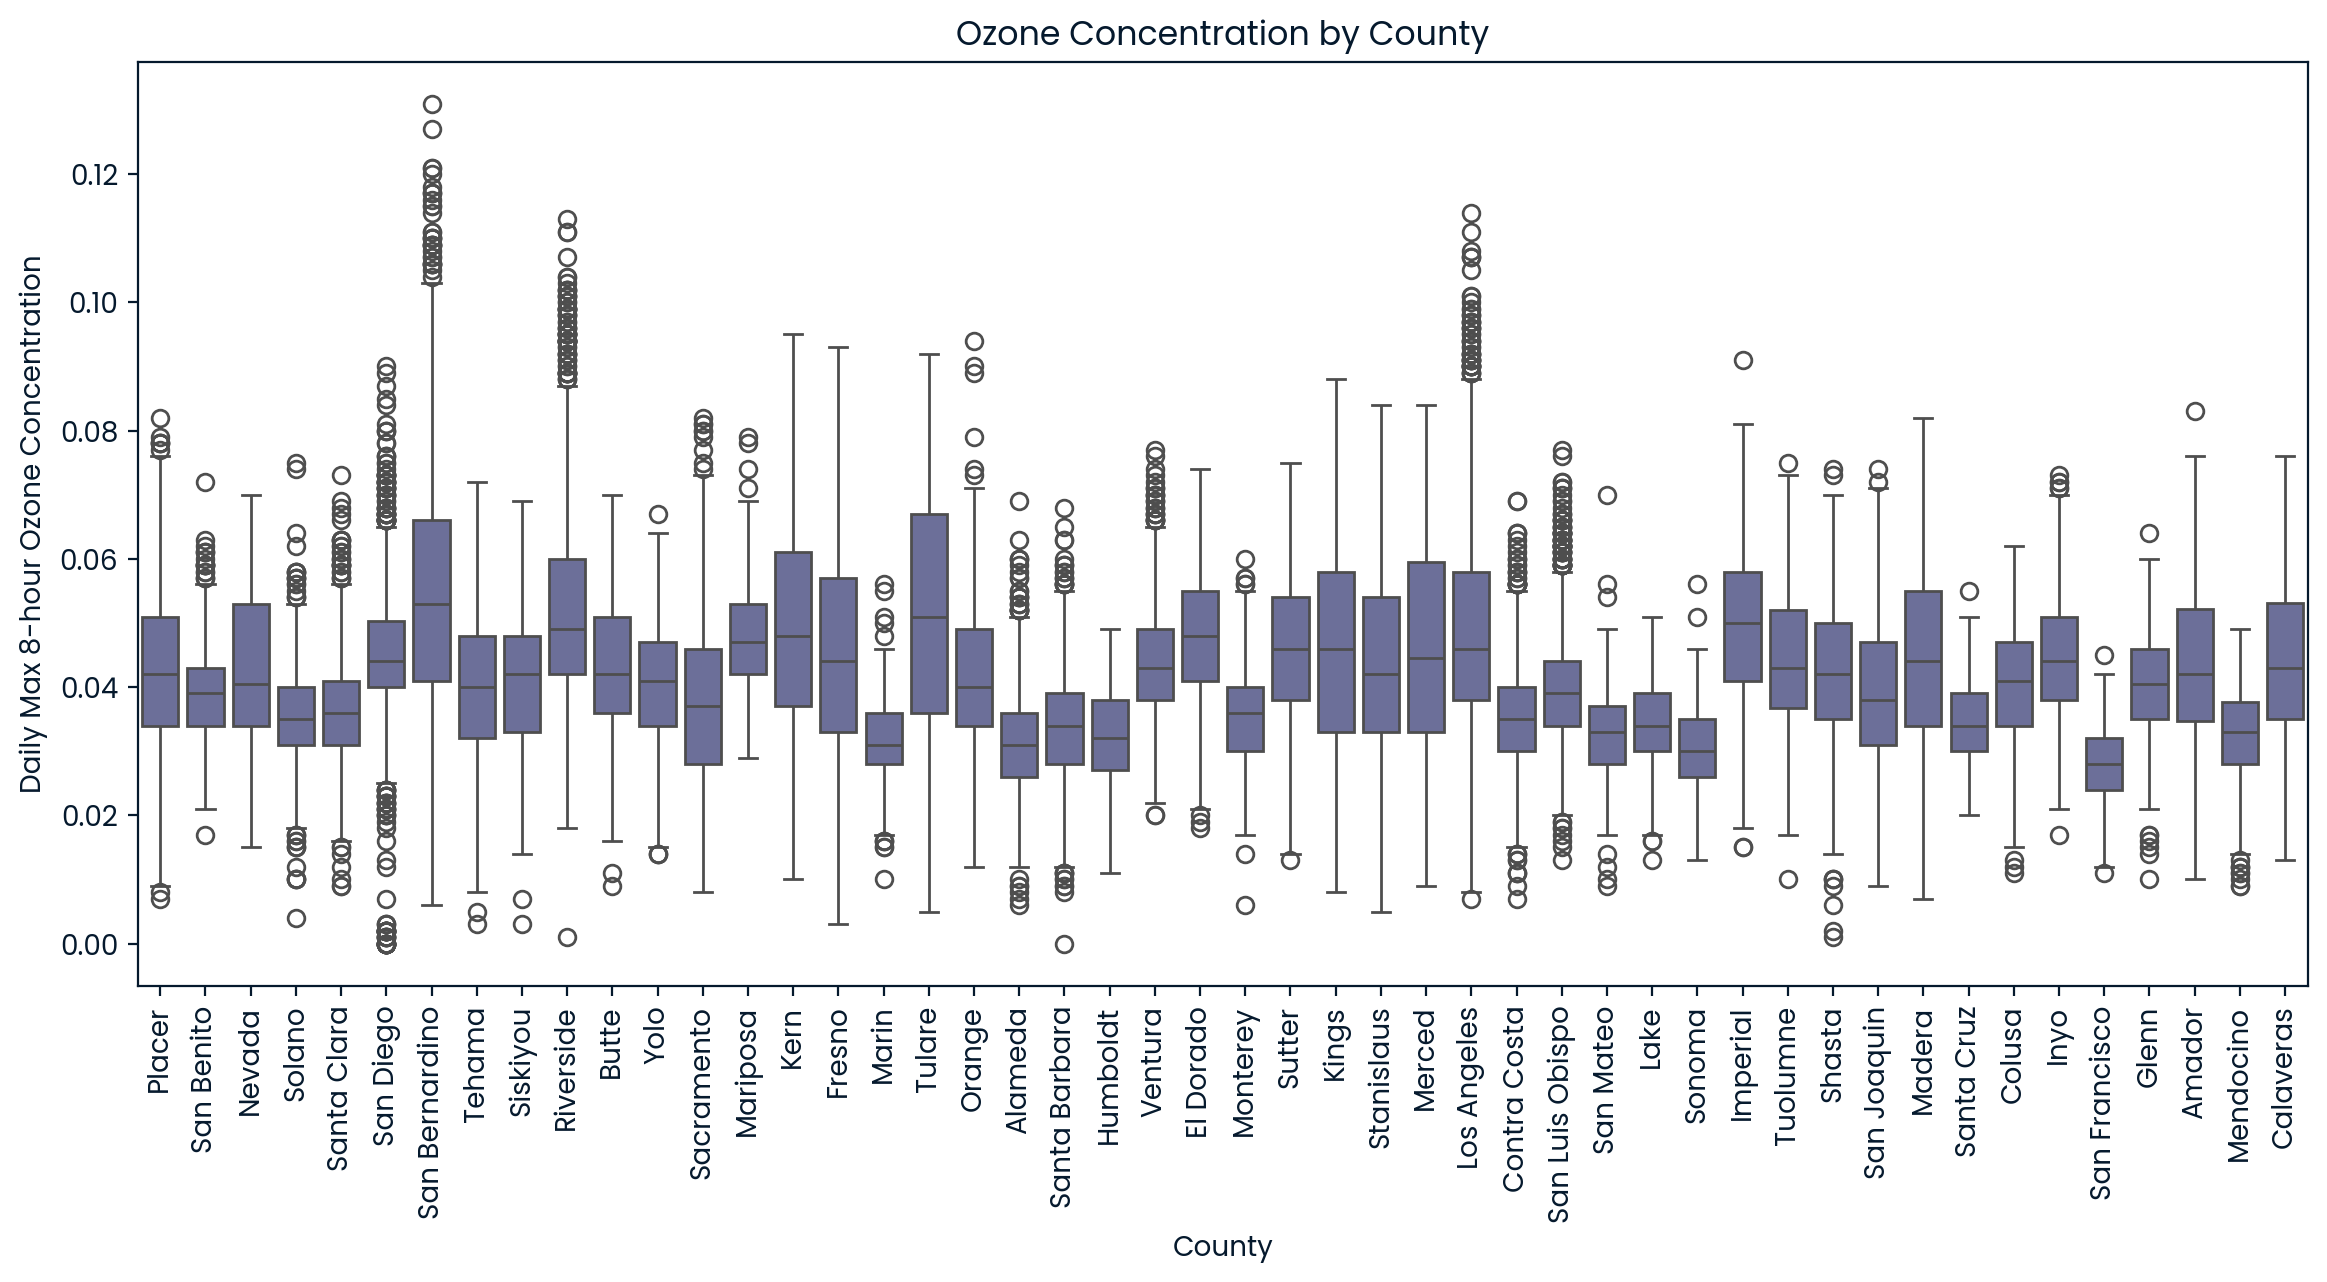

In [100]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='County', y='Daily Max 8-hour Ozone Concentration')
plt.xticks(rotation=90)
plt.title('Ozone Concentration by County')

**This boxplot illustrates the distribution of daily maximum 8-hour ozone concentrations across California counties.**

**Some counties such as San Bernardino, Riverside, and Fresno consistently show higher median ozone concentrations and more frequent extreme values (outliers), indicating elevated pollution levels.**

**In contrast, counties like San Mateo, San Francisco, and Santa Cruz tend to have lower ozone levels, suggesting cleaner air conditions.**

### 2. Are there any areas that consistently show high ozone concentrations?

<Axes: title={'center': 'Top 10 Counties with Highest Ozone Levels'}, xlabel='County'>

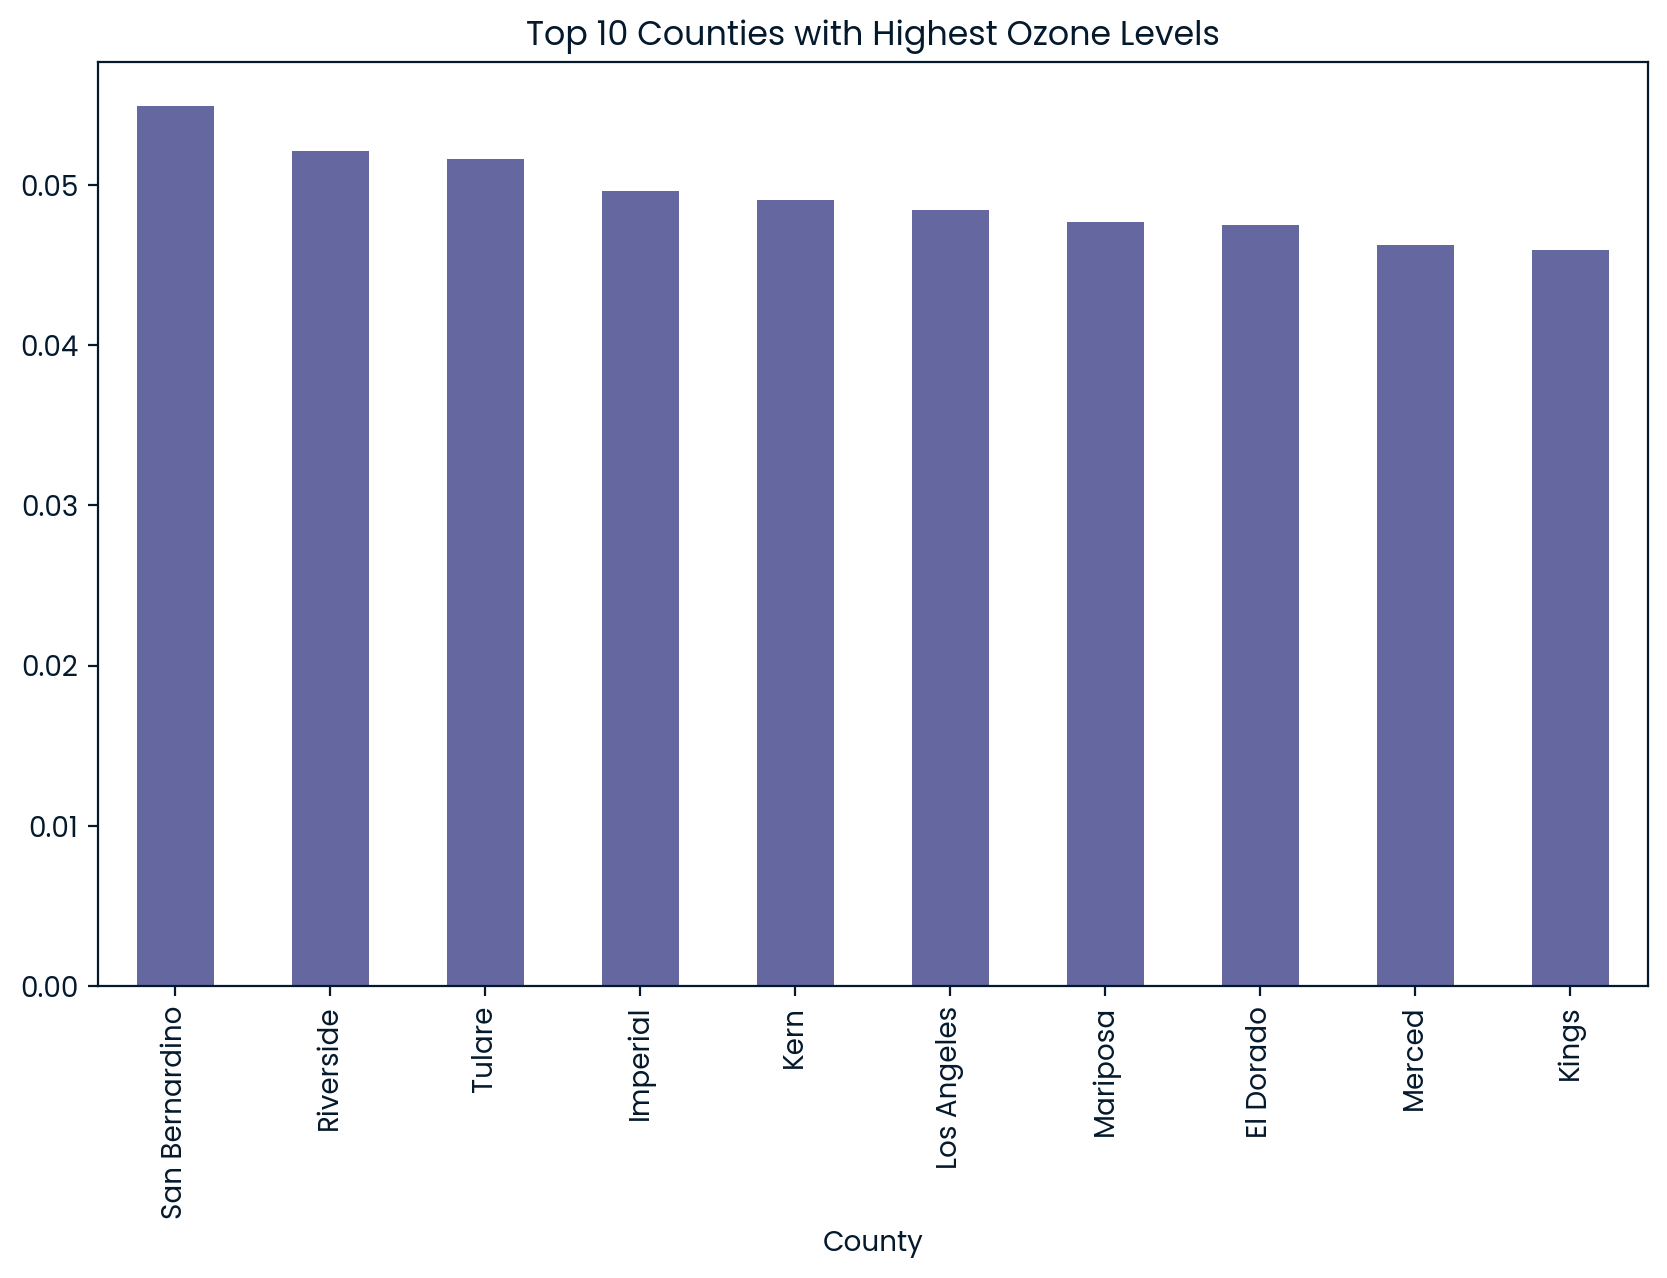

In [101]:
top_ozone = df.groupby('County')['Daily Max 8-hour Ozone Concentration'].mean().sort_values(ascending=False).head(10)
top_ozone.plot(kind='bar', figsize=(10,6), title='Top 10 Counties with Highest Ozone Levels')

**San Bernardino, Riverside, and Tulare lead the list, indicating persistent high ozone pollution in these areas.**

**These counties may be experiencing more industrial activity, vehicle emissions, or geographic factors that trap ozone.**

### 3. Do different methods report different ozone levels?

Text(0.5, 1.0, 'Ozone by Method Code')

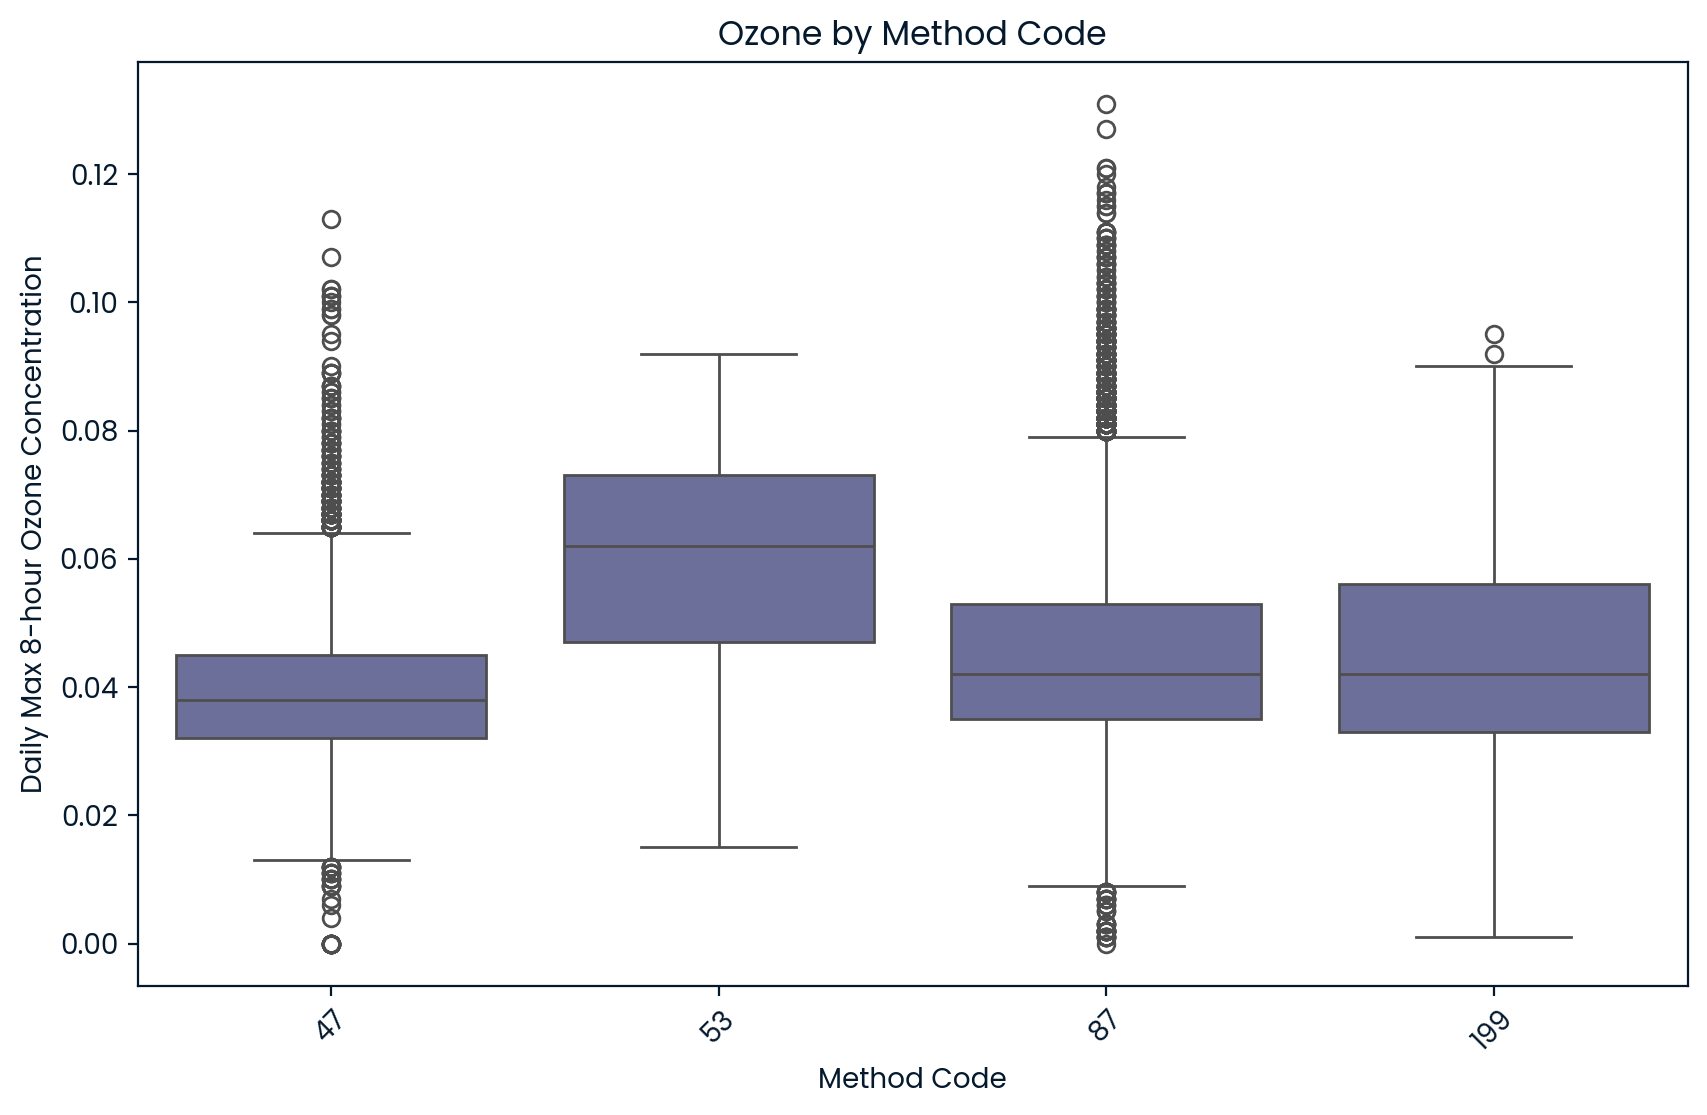

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Method Code', y='Daily Max 8-hour Ozone Concentration')
plt.xticks(rotation=45)
plt.title('Ozone by Method Code')

**Method code 53 shows the highest median ozone concentration, suggesting a notable pollution level associated with this measurement technique.**

**Variations in ozone levels, especially the wide range in method code 87, may indicate inconsistent environmental conditions or measurement variability.**

### 4. if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.

<Axes: xlabel='Day Type', ylabel='Daily Max 8-hour Ozone Concentration'>

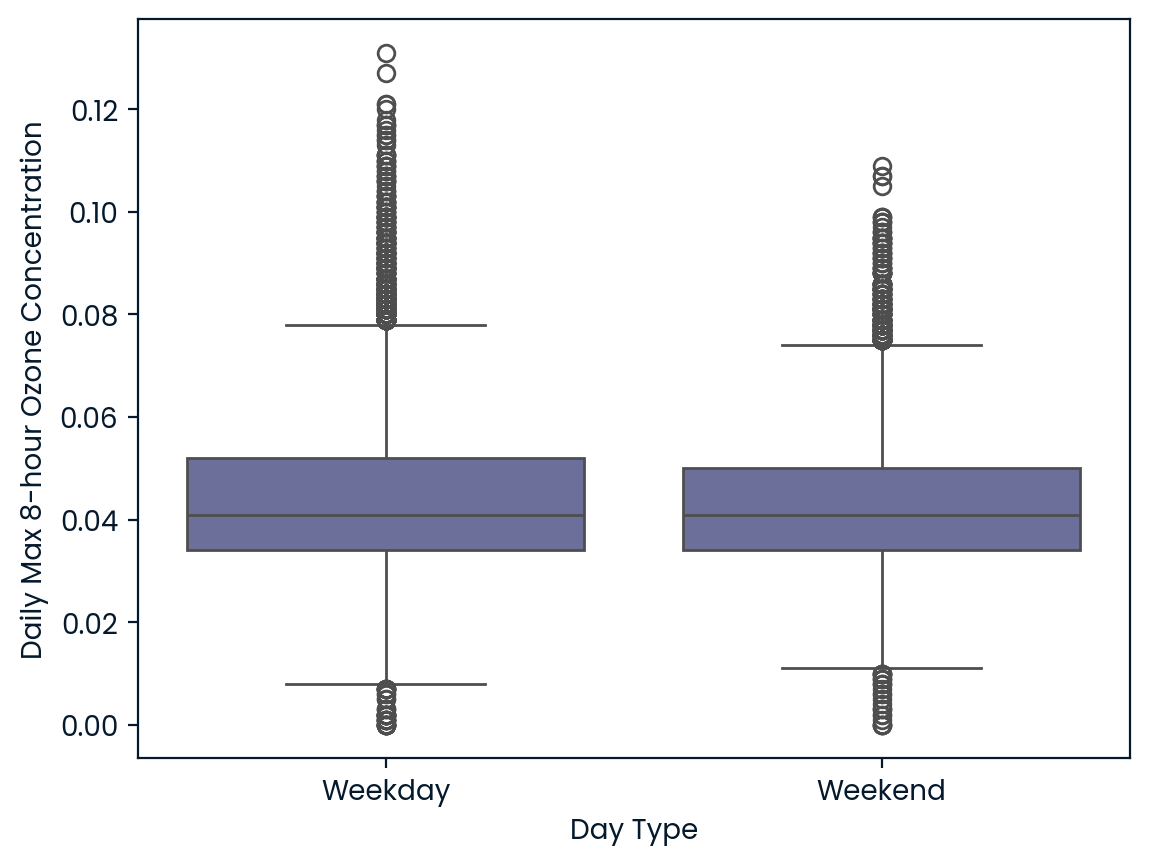

In [103]:
df['Day'] = df['Date'].dt.dayofweek
df['Day Type'] = df['Day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
sns.boxplot(data=df, x='Day Type', y='Daily Max 8-hour Ozone Concentration')

**Weekdays exhibit a higher median ozone concentration, indicating greater pollution levels during workdays.**

**The wider range of ozone levels on weekdays suggests more variability, possibly due to increased industrial and traffic activity.**

### 5. plot a geospatial heatmap showing any high ozone concentrations.

In [104]:
from folium.plugins import HeatMap
import folium

map = folium.Map(location=[37.5, -119.5], zoom_start=6)
heat_data = [[row['Site Latitude'], row['Site Longitude'], row['Daily Max 8-hour Ozone Concentration']] 
             for index, row in df.dropna(subset=['Site Latitude', 'Site Longitude', 'Daily Max 8-hour Ozone Concentration']).iterrows()]
HeatMap(heat_data,name='Ozone Heatmap').add_to(map)
folium.Marker(
    location=[37.5, -119.5],
    popup=folium.Popup(
        "📍 Ozone Concentration Levels:<br>"
        "<b>🔴 Red</b>: High pollution<br>"
        "<b>🟠 Orange</b>: Moderate pollution<br>"
        "<b>🟢 Green</b>: Low pollution<br><br>"
        "This map shows areas with high ozone concentration using color intensity.",
        max_width=300
    ),
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(map)
folium.LayerControl().add_to(map)
map

**Areas with red and orange hues, particularly around Los Angeles, San Bernardino, and parts of Central California, indicate high to moderate ozone pollution.**

**Lower pollution levels are observed in greener areas, such as parts of Nevada and eastern Arizona, suggesting less industrial or vehicular activity.**

**finally prepare dataframe to save**

In [105]:
df.drop(columns=['Day','Month','Day Type'],inplace=True)
df.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60610004,1,0.027,ppm,25.0,Colfax-City Hall,17,100,87,40900,"Sacramento-Roseville-Arden-Arcade, CA",61,Placer,39.100174,-120.953832
1,2024-01-01,AQS,60690003,1,0.031,ppm,29.0,Pinnacles NP,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.483240,-121.156880
2,2024-01-01,AirNow,60570005,1,0.030,ppm,28.0,Grass Valley-Litton Building,24,100,87,46020,"Truckee-Grass Valley, CA",57,Nevada,39.233477,-121.055608
3,2024-01-01,AQS,60953003,1,0.032,ppm,30.0,Vacaville-Ulatis Drive,17,100,87,46700,"Vallejo-Fairfield, CA",95,Solano,38.356550,-121.949860
4,2024-01-01,AQS,60851001,1,0.025,ppm,23.0,Los Gatos,17,100,47,41940,"San Jose-Sunnyvale-Santa Clara, CA",85,Santa Clara,37.226862,-121.979675


In [106]:
df.to_csv('cleaned_ozone_data.csv', index=False)

# 📌 Recommendations

**1. Increase ozone monitoring in San Bernardino, Riverside, and Tulare counties.**

**2. Investigate the impact of high ozone levels in urban areas during weekdays.**
   
**3. Promote clean energy policies and transportation alternatives in Central Valley.**

**4. Use collection methods with more consistent readings (based on Method Code analysis).**

# ✅ Conclusion

**Ozone pollution in California varies by time and location, peaking in summer and in urban regions. Our data-driven analysis highlights critical areas needing intervention to protect public health.**